In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder


/Users/navyatrilok/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/navyatrilok/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Reading Data

In [42]:
mushrooms = pd.read_csv('/Users/navyatrilok/Documents/DATASCIENCE/Datasets/mushrooms.csv')

In [43]:
mushrooms.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [44]:
mushrooms.shape

(8124, 23)

In [45]:
X = mushrooms.iloc[:,1:]
y = mushrooms.iloc[:,0]

In [46]:
X.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

## Preprocessing

In [20]:
encoding = OrdinalEncoder()
X = encoding.fit_transform(X)

In [21]:
X

array([[5., 2., 4., ..., 2., 3., 5.],
       [5., 2., 9., ..., 3., 2., 1.],
       [0., 2., 8., ..., 3., 2., 3.],
       ...,
       [2., 2., 4., ..., 0., 1., 2.],
       [3., 3., 4., ..., 7., 4., 2.],
       [5., 2., 4., ..., 4., 1., 2.]])

In [29]:
encoding = OrdinalEncoder()
X = pd.DataFrame(encoding.fit_transform(X),columns = X.columns)

In [30]:
X

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
1,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0
3,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
4,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,1.0,...,2.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,0.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8120,5.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,0.0,...,2.0,5.0,5.0,0.0,0.0,1.0,4.0,0.0,4.0,2.0
8121,2.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8122,3.0,3.0,4.0,0.0,8.0,1.0,0.0,1.0,0.0,1.0,...,1.0,7.0,7.0,0.0,2.0,1.0,0.0,7.0,4.0,2.0


## Model Fitting

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.25)
X_train.shape,y_train.shape

((6093, 22), (6093,))

In [34]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)
model.score(X_test,y_test)

1.0

In [35]:
model.get_depth(),model.get_n_leaves()#It has not used all the 23 features, it is using only some by looking at depth
#That means entropy is becomming zero early

(7, 13)

In [ ]:
We can also see the feature importance

In [36]:
model.feature_importances_ #0 indicates it did not use those features at all in building the tree

array([0.        , 0.        , 0.        , 0.02660492, 0.02387925,
       0.        , 0.        , 0.14405049, 0.27490968, 0.        ,
       0.10129765, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.38051882,
       0.02349901, 0.02524018])

In [40]:
model.feature_importances_!=0

array([False, False, False,  True,  True, False, False,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False,  True,  True,  True])

In [47]:
X.columns[model.feature_importances_!=0]

Index(['bruises', 'odor', 'gill_size', 'gill_color', 'stalk_root',
       'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [50]:
X.columns[model.feature_importances_ > 0.1]

Index(['gill_size', 'gill_color', 'stalk_root', 'spore_print_color'], dtype='object')

In [57]:
X = mushrooms[['gill_size', 'gill_color', 'stalk_root', 'spore_print_color']]
y = mushrooms['type']

In [58]:
X = pd.DataFrame(encoding.fit_transform(X),columns=X.columns)

In [59]:
X.head()

,gill_size,gill_color,stalk_root,spore_print_color
0,1.0,4.0,3.0,2.0
1,0.0,4.0,2.0,3.0
2,0.0,5.0,2.0,3.0
3,1.0,5.0,3.0,2.0
4,0.0,4.0,3.0,3.0


In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=2000)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6124, 4), (2000, 4), (6124,), (2000,))

## Predictions

In [62]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9875

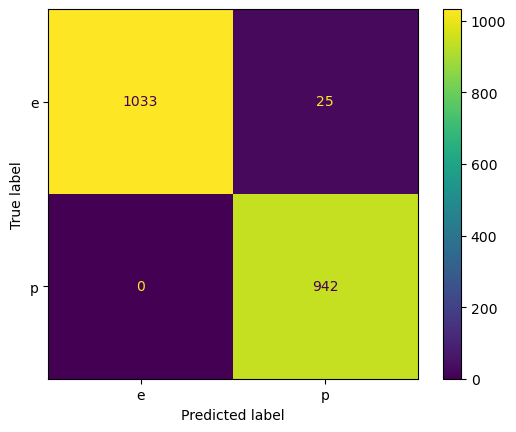

In [63]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)
plt.show()

In [ ]:
#Edible mushrooms are predicted as poisonous

#whenever no of features decreases computations also decreases

In [64]:
model.get_depth(), model.get_n_leaves()

(10, 28)

In [65]:
model.feature_importances_

array([0.15076899, 0.29959065, 0.13305372, 0.41658665])

In [ ]:
Q) Why to do the analysis when we have feature importances method to get the features to be used for building the model?

A) Machine do not know the relations of the features, it does not know if the features are dependent or not. I always thinks
that there is dependency.

Eg., tossing a coin

age    gender   Toss
17.    Male.    Head
58.    Female.  Tail
64.    Female.  Tail
12.    Male.    Head


It is baised data, machine will think Male's will get Head, females will get Tail, it will not consider other columns


Hence we need to do EDA, our analysis

We can depend of feature_importances_ if we do not know anything about data and atleast we want to start something